In [1]:
import unittest, sys, io, pandas as pd
from contextlib import redirect_stdout
from unittest.mock import patch

In [2]:
from hw6 import *
import hw6
from compare_pandas import *

Resources:<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html <br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html <br>
https://www.kaggle.com/fernandol/countries-of-the-world <br>
https://www.kaggle.com/  <br>
https://pandas.pydata.org/pandas-docs/stable/text.html  <br>

`csv_to_dataframe`: This function takes a csv filename as an argument and returns a `DataFrame`.  The csv looks like this (a screenshot of part of the file):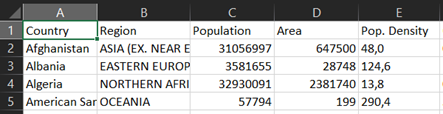

and the frame looks like this:<br>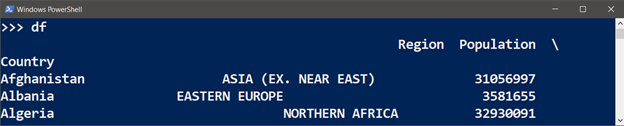

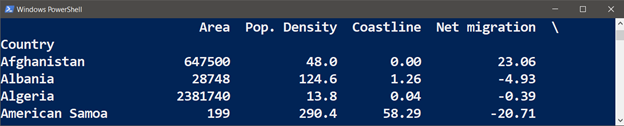

In [4]:
# csv_to_dataframe

In [5]:
class TestFns(unittest.TestCase):
    def test_csv_to_dataframe(self):
        correct = pd.read_pickle('all_countries0.pkl')
        tester = csv_to_dataframe('countries_of_the_world.csv')
        self.assertTrue(compare_frames_str(correct, tester))
        
test = unittest.defaultTestLoader.loadTestsFromTestCase(TestFns)
results = unittest.TextTestRunner().run(test)

if len(results.errors) == len(results.failures) == 0:
    print('csv_to_dataframe passes!')
else:
    print('csv_to_dataframe does not pass.')

.

csv_to_dataframe passes!



----------------------------------------------------------------------
Ran 1 test in 0.114s

OK


`format_df`: This function takes a countries `DataFrame` as created by the previous function.  Those regions look pretty nasty, so replace them with title-case versions of themselves, and with all leading and trailing whitespace stripped.  Also, the country names have trailing whitespace.  Replace the index by assigning a list of stripped country names to it.  That will also get rid of the index name, `Country`.  Alter the frame in-place.  https://pandas.pydata.org/pandas-docs/stable/text.html will be extremely helpful.  It looks better now: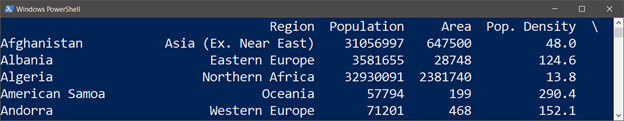

In [6]:
# format_df

In [7]:
class TestFns(unittest.TestCase):
    def test_format_df(self):
        correct = pd.read_pickle('all_countries1.pkl')
        df = pd.read_pickle('all_countries0.pkl')
        self.assertIsNone(format_df(df))
        self.assertTrue(compare_frames_str(correct, df))

test = unittest.defaultTestLoader.loadTestsFromTestCase(TestFns)
results = unittest.TextTestRunner().run(test)

if len(results.errors) == len(results.failures) == 0:
    print('format_df passes!')
else:
    print('format_df does not pass.')

.

format_df passes!



----------------------------------------------------------------------
Ran 1 test in 0.081s

OK


`growth_rate`: Now we are going to work with the frame's `Birthrate` and `Deathrate` data:
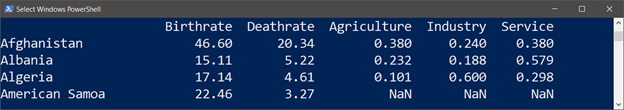

This function takes a formatted countries `DataFrame`.   It adds a new column labeled `Growth Rate` to the frame.  Each value in the `Growth Rate` column is calculated by subtracting the `Deathrate` for that row from the `Birthrate` for that row (we are ignoring the effects of migration).  Alter the argument in-place, i.e. don't create a new frame.  Here's what the new column looks like: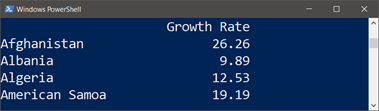

In [8]:
# growth_rate

In [9]:
class TestFns(unittest.TestCase):
    def test_growth_rate(self):
        correct = pd.read_pickle('all_countries2.pkl')
        df = pd.read_pickle('all_countries1.pkl')
        self.assertIsNone(growth_rate(df))
        self.assertTrue(compare_frames_str(correct, df))

test = unittest.defaultTestLoader.loadTestsFromTestCase(TestFns)
results = unittest.TextTestRunner().run(test)

if len(results.errors) == len(results.failures) == 0:
    print('growth_rate passes!')
else:
    print('growth_rate does not pass.')

.

growth_rate passes!



----------------------------------------------------------------------
Ran 1 test in 0.116s

OK


Add this code to your module:

In [11]:
def dod(p, r):
    num_yrs = 0
    while p  > 2:
        p = p + p * r / 1000 
        num_yrs += 1
    return num_yrs

This function takes an initial population and a growth rate <font color=green>***(which must be negative – why?)***<font color=black> in 1000's of individuals per year and returns the number of years it will take for the population of the country to go extinct if the growth rate doesn't change.  We consider the population extinct if it is down to no more than two individuals, but this stretches out the time considerably because of the way the math of exponential decay works.  1,000 or 10,000 individuals would probably be more reasonable definition of extinct.

`years_to_extinction`: This function takes a formatted countries `DataFrame` that has a `Growth Rate` column and adds a column labeled `Years to Extinction`.  Initialize the values in this column to `np.nan`: 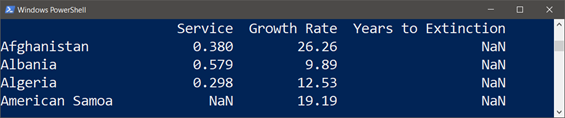

Replace the `NaN` in the new column for every country that has a negative growth rate with the number of years until the population is extinct: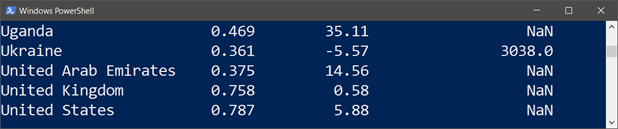

In [12]:
# years_to_extinction

In [13]:
class TestFns(unittest.TestCase):
    def test_years_to_extinction(self):
        correct = pd.read_pickle('all_countries3.pkl')
        df = pd.read_pickle('all_countries2.pkl')
        self.assertIsNone(years_to_extinction(df))
        self.assertTrue(compare_frames_str(correct, df))

test = unittest.defaultTestLoader.loadTestsFromTestCase(TestFns)
results = unittest.TextTestRunner().run(test)

if len(results.errors) == len(results.failures) == 0:
    print('years_to_extinction passes!')
else:
    print('years_to_extinction does not pass.')

.

years_to_extinction passes!



----------------------------------------------------------------------
Ran 1 test in 0.842s

OK


`dying_countries`: This function takes a formatted countries `DataFrame` that has a `Years to Extinction` column and returns a `Series` whose labels are the countries with negative growth rates and whose values are the number of years until they're dead in sorted order from first to last to die: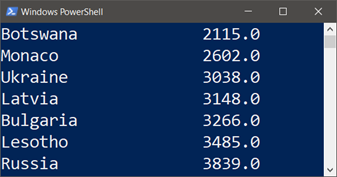

In [15]:
# dying_countries

`main`: `main` creates a frame from `countries_of_the_world.csv`, formats the frame, adds `Growth Rate` and `Years to Extinction` columns to it, and prints the top 5 dying countries in this format: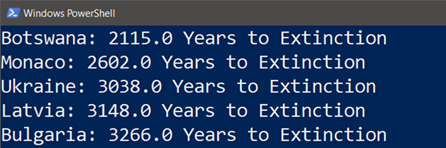

In [16]:
class TestFns(unittest.TestCase):
    def test_dying_countries(self):
        correct = pd.read_pickle('dying.pkl')
        df = pd.read_pickle('all_countries3.pkl')
        self.assertTrue(compare_series(correct, dying_countries(df)))

test = unittest.defaultTestLoader.loadTestsFromTestCase(TestFns)
results = unittest.TextTestRunner().run(test)

if len(results.errors) == len(results.failures) == 0:
    print('dying_countries passes!')
else:
    print('dying_countries does not pass.')

.

dying_countries passes!



----------------------------------------------------------------------
Ran 1 test in 0.031s

OK


In [18]:
# main

In [19]:
class TestFns(unittest.TestCase):
    def test_main(self):
        with io.StringIO() as buf, redirect_stdout(buf):
            res = 'Botswana: 2115.0 Years to Extinction\n' +\
            'Monaco: 2602.0 Years to Extinction\n' +\
            'Ukraine: 3038.0 Years to Extinction\n' +\
            'Latvia: 3148.0 Years to Extinction\n' +\
            'Bulgaria: 3266.0 Years to Extinction\n'
            main()
            self.assertEqual(res, buf.getvalue())

test = unittest.defaultTestLoader.loadTestsFromTestCase(TestFns)
results = unittest.TextTestRunner().run(test)

if len(results.errors) == len(results.failures) == 0:
    print('main passes!')
else:
    print('main does not pass.')

.

main passes!



----------------------------------------------------------------------
Ran 1 test in 0.750s

OK
